In [51]:
import pandas as pd
import numpy as np

In [52]:
loc= 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Dataset\\Final Output\\Weekly\\'


data= pd.read_excel(loc + 'Data_Weekly.xlsx', index_col=False)
data.head()



,Location,Item,Date,Quantity,Amount
0,FREMONT,CHICKEN XXXXX - O,2020-01-05,37.023380,184.746667
1,FREMONT,CHICKEN XXXXX - O,2020-01-12,41.889780,209.030000
2,FREMONT,CHICKEN XXXXX - O,2020-01-19,86.101210,429.645000
3,FREMONT,CHICKEN XXXXX - O,2020-01-26,63.834068,318.532000
4,FREMONT,CHICKEN XXXXX - O,2020-02-02,45.320977,226.151667


In [53]:
import copy
data_df= copy.deepcopy(data)

In [54]:
data_df['Location'].unique()

array(['FREMONT', 'HAYWARD', 'LAKEWOOD', 'RICHMOND CA',
       'S SAN FRANCISCO BUS CTR'], dtype=object)

In [55]:
data_df['Item'].unique()

array(['CHICKEN XXXXX - O', 'DRUMSTICKS NNNN', 'FILLET QQQQ',
       'BEEF OOOO - GT'], dtype=object)

In [56]:
data_df2 = data_df[(data_df['Location']== 'FREMONT') & (data_df['Item']== 'CHICKEN XXXXX - O')]
data_df2

,Location,Item,Date,Quantity,Amount
0,FREMONT,CHICKEN XXXXX - O,2020-01-05,37.023380,184.746667
1,FREMONT,CHICKEN XXXXX - O,2020-01-12,41.889780,209.030000
2,FREMONT,CHICKEN XXXXX - O,2020-01-19,86.101210,429.645000
3,FREMONT,CHICKEN XXXXX - O,2020-01-26,63.834068,318.532000
4,FREMONT,CHICKEN XXXXX - O,2020-02-02,45.320977,226.151667
...,...,...,...,...,...
147,FREMONT,CHICKEN XXXXX - O,2022-10-30,38.625329,231.365714
148,FREMONT,CHICKEN XXXXX - O,2022-11-06,52.301170,313.284000
149,FREMONT,CHICKEN XXXXX - O,2022-11-13,41.523016,248.722857
150,FREMONT,CHICKEN XXXXX - O,2022-11-20,36.942523,221.285714


In [57]:
data_df2= data_df2.drop(['Location', 'Item'], axis=1)
data_df2

,Date,Quantity,Amount
0,2020-01-05,37.023380,184.746667
1,2020-01-12,41.889780,209.030000
2,2020-01-19,86.101210,429.645000
3,2020-01-26,63.834068,318.532000
4,2020-02-02,45.320977,226.151667
...,...,...,...
147,2022-10-30,38.625329,231.365714
148,2022-11-06,52.301170,313.284000
149,2022-11-13,41.523016,248.722857
150,2022-11-20,36.942523,221.285714


In [58]:
data_df2.set_index('Date')

,Quantity,Amount
Date,,
2020-01-05,37.023380,184.746667
2020-01-12,41.889780,209.030000
2020-01-19,86.101210,429.645000
2020-01-26,63.834068,318.532000
2020-02-02,45.320977,226.151667
...,...,...
2022-10-30,38.625329,231.365714
2022-11-06,52.301170,313.284000
2022-11-13,41.523016,248.722857


In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

result=seasonal_decompose(data_df2['Quantity'], model='multiplicable', period=52, extrapolate_trend= 'freq')

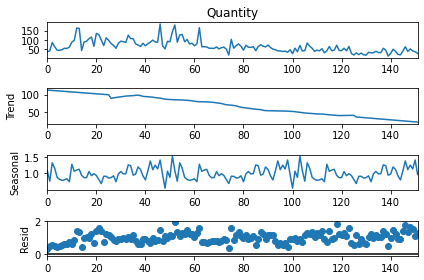

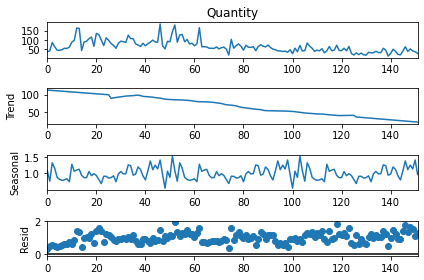

In [61]:
result.plot()

In [62]:
se_out1= pd.DataFrame()

se_out1['Trend'] = result.trend
se_out1['seasonal']  = result.seasonal
se_out1['resid']  = result.resid

In [63]:
se_out1          

,Trend,seasonal,resid
0,112.453897,1.085194,0.303385
1,111.930588,0.761799,0.491268
2,111.407280,1.325704,0.582974
3,110.883972,1.158430,0.496952
4,110.360663,0.881556,0.465838
...,...,...,...
147,25.356623,1.115853,1.365130
148,24.786812,1.254536,1.681929
149,24.217001,1.137524,1.507329
150,23.647190,1.411738,1.106606


In [64]:
df = pd.concat([data_df2,se_out1], axis=1 )     #Multiplicative 
df

,Date,Quantity,Amount,Trend,seasonal,resid
0,2020-01-05,37.023380,184.746667,112.453897,1.085194,0.303385
1,2020-01-12,41.889780,209.030000,111.930588,0.761799,0.491268
2,2020-01-19,86.101210,429.645000,111.407280,1.325704,0.582974
3,2020-01-26,63.834068,318.532000,110.883972,1.158430,0.496952
4,2020-02-02,45.320977,226.151667,110.360663,0.881556,0.465838
...,...,...,...,...,...,...
147,2022-10-30,38.625329,231.365714,25.356623,1.115853,1.365130
148,2022-11-06,52.301170,313.284000,24.786812,1.254536,1.681929
149,2022-11-13,41.523016,248.722857,24.217001,1.137524,1.507329
150,2022-11-20,36.942523,221.285714,23.647190,1.411738,1.106606


In [65]:
112.453897+1.085194+0.303385    #Multiplicative decomposition 

113.842476

In [66]:
max(0,(1-result.resid.var()/(result.resid+result.seasonal).var()))

0.2632027963238379

In [73]:
## Additive

result1=seasonal_decompose(data_df2['Quantity'], model='Additive', period= int(52.179), extrapolate_trend= 'freq')

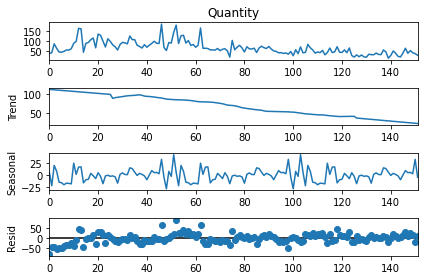

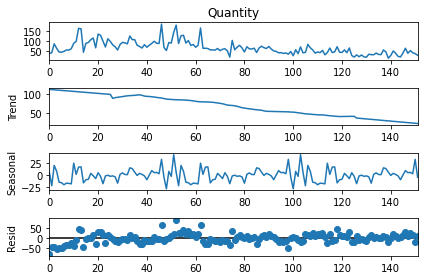

In [74]:
result1.plot()

In [75]:
se_out2= pd.DataFrame()

se_out2['Trend'] = result1.trend
se_out2['seasonal']  = result1.seasonal
se_out2['resid']  = result1.resid

In [76]:
se_out2

,Trend,seasonal,resid
0,112.453897,6.255626,-81.686142
1,111.930588,-21.630145,-48.410663
2,111.407280,19.841826,-45.147896
3,110.883972,7.945284,-54.995188
4,110.360663,-14.420466,-50.619221
...,...,...,...
147,25.356623,5.085402,8.183304
148,24.786812,5.561347,21.953011
149,24.217001,2.904209,14.401806
150,23.647190,32.301098,-19.005765


In [77]:
df2 = pd.concat([data_df2,se_out2], axis=1 )
df2

,Date,Quantity,Amount,Trend,seasonal,resid
0,2020-01-05,37.023380,184.746667,112.453897,6.255626,-81.686142
1,2020-01-12,41.889780,209.030000,111.930588,-21.630145,-48.410663
2,2020-01-19,86.101210,429.645000,111.407280,19.841826,-45.147896
3,2020-01-26,63.834068,318.532000,110.883972,7.945284,-54.995188
4,2020-02-02,45.320977,226.151667,110.360663,-14.420466,-50.619221
...,...,...,...,...,...,...
147,2022-10-30,38.625329,231.365714,25.356623,5.085402,8.183304
148,2022-11-06,52.301170,313.284000,24.786812,5.561347,21.953011
149,2022-11-13,41.523016,248.722857,24.217001,2.904209,14.401806
150,2022-11-20,36.942523,221.285714,23.647190,32.301098,-19.005765


In [81]:
112.453897+(6.255626)+(-81.686142)     ##Additive decomposition

37.023381

In [87]:
for i in data_df['Location'].unique():
    df= data_df[data_df['Location']==i]
    for j in df['Item'].unique():
        item_data= df[df["Item"]==j]
        
        item_data= item_data.drop(['Location', 'Item'], axis=1)
#         train_dates = pd.to_datetime(item_data['Date']) 
        item_data.set_index('Date')
#         print(item_data)
        time_series = item_data.index  #Get dates for test data
        
        
        result=seasonal_decompose(item_data['Quantity'], model='Additive', period=int(52.179), extrapolate_trend= 'freq')
        
        #Results
        se_out= pd.DataFrame()
        se_out['Trend'] = result.trend
        se_out['seasonality']  = result.seasonal
        se_out['remainder']  = result.resid
#         se_out['Date']= train_dates.values
        df_out = pd.concat([item_data,se_out], axis=1 )
    
        
        #Saving Results 
        df_out['Location']= i
        df_out['Item']=j
        
        predction_output = "ModelOut\seasonality\Weekly\season_" +i+"-"+j+".xlsx"
        df_out.to_excel(predction_output, index= False)
#         print(df_out)
  

In [88]:
import pandas as pd
import os
import glob

In [89]:
path = 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Code\\ModelOut\\seasonality\\Weekly'
out_files = glob.glob(os.path.join(path, "*.xlsx"))
   
dfs= []


for f in out_files:
    dfs.append(pd.read_excel(f))
df_season=pd.concat(dfs, ignore_index=True)

In [90]:
df_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2127 non-null   datetime64[ns]
 1   Quantity     2127 non-null   float64       
 2   Amount       2127 non-null   float64       
 3   Trend        2127 non-null   float64       
 4   seasonality  2127 non-null   float64       
 5   remainder    2127 non-null   float64       
 6   Location     2127 non-null   object        
 7   Item         2127 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 133.1+ KB


In [91]:
df_season.to_excel('Seasonality_Additive_all_Weekly.xlsx', index=False)